In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive

MyDrive/


In [ ]:
train_dir = '/content/drive/MyDrive/dataset2-master/dataset2-master/images/TRAIN'
test_dir = '/content/drive/MyDrive/dataset2-master/dataset2-master/images/TEST'

In [ ]:
# Create generators

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input ,
    validation_split= 0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input ,
    validation_split= 0.2
)

In [ ]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory = train_dir , target_size = (224,224) , color_mode = 'rgb' ,
    class_mode = 'categorical' , batch_size = 32 , shuffle= True , seed = 42,
    subset = 'training'
)

val_images = train_gen.flow_from_directory(
    directory = train_dir , target_size = (224,224) , color_mode = 'rgb' ,
    class_mode = 'categorical' , batch_size = 32 , shuffle= True , seed = 42,
    subset = 'validation'
)


test_images = test_gen.flow_from_directory(
    directory = test_dir , target_size = (224,224) , color_mode = 'rgb' ,
    class_mode = 'categorical' , batch_size = 32 , shuffle= False , seed = 42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [ ]:
# Load the MobileNetV2 model
pretrained_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Fine-tune the last few layers of the pretrained model
for layer in pretrained_model.layers[:-10]:
    layer.trainable = False



9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Build a custom head on top of the pretrained model
model = models.Sequential()
model.add(pretrained_model)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               5

In [ ]:
# Training Data Generator with Augmentation
train_images_augmented = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)


Found 9957 images belonging to 4 classes.


In [ ]:
# Training with Augmented Data
history = model.fit(
    train_images_augmented,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
312/312 [==============================] - 1601s 5s/step - loss: 1.4455 - accuracy: 0.4745 - val_loss: 2.5857 - val_accuracy: 0.4334
Epoch 2/100
312/312 [==============================] - 163s 521ms/step - loss: 0.9602 - accuracy: 0.6399 - val_loss: 2.5313 - val_accuracy: 0.5405
Epoch 3/100
312/312 [==============================] - 166s 531ms/step - loss: 0.7508 - accuracy: 0.7126 - val_loss: 3.3159 - val_accuracy: 0.4987
Epoch 4/100
312/312 [==============================] - 166s 531ms/step - loss: 0.5939 - accuracy: 0.7689 - val_loss: 1.9460 - val_accuracy: 0.5857
Epoch 5/100
312/312 [==============================] - 165s 529ms/step - loss: 0.5261 - accuracy: 0.8004 - val_loss: 0.8486 - val_accuracy: 0.7124
Epoch 6/100
312/312 [==============================] - 163s 523ms/step - loss: 0.4665 - accuracy: 0.8159 - val_loss: 0.5572 - val_accuracy: 0.7919
Epoch 7/100
312/312 [==============================] - 167s 535ms/step - loss: 0.4181 - accuracy: 0.8339 - val_loss: 0.4

    Epoch  Train_Accuracy  Validation_Accuracy
0       1        0.474541             0.433384
1       2        0.639851             0.540473
2       3        0.712564             0.498743
3       4        0.768906             0.585721
4       5        0.800442             0.712418
5       6        0.815908             0.791855
6       7        0.833886             0.845651
7       8        0.852365             0.728507
8       9        0.864216             0.879839
9      10        0.877975             0.929110
10     11        0.884202             0.926094
11     12        0.887717             0.930116
12     13        0.903686             0.928607
13     14        0.908004             0.911513
14     15        0.913428             0.960282
15     16        0.917244             0.952740
16     17        0.916742             0.965812
17     18        0.926785             0.920060
18     19        0.930602             0.884364
19     20        0.934318             0.931624
20     21    

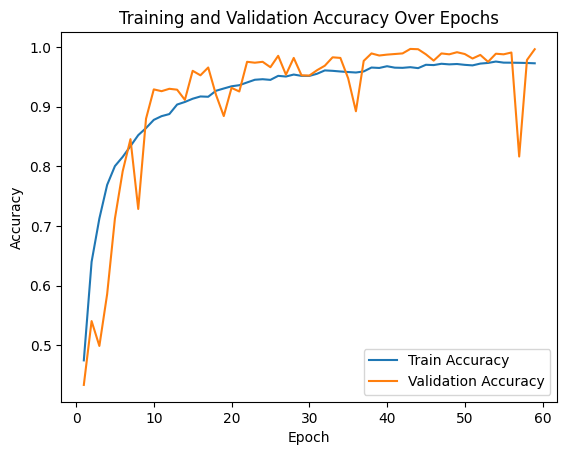

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `history` is the result from the training
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a DataFrame
history_df = pd.DataFrame({
    'Epoch': range(1, len(train_accuracy) + 1),
    'Train_Accuracy': train_accuracy,
    'Validation_Accuracy': val_accuracy
})

# Display the DataFrame
print(history_df)

# Save the DataFrame to a CSV file
history_df.to_csv('training_history.csv', index=False)

# Plot training and validation accuracy over epochs
plt.plot(history_df['Epoch'], history_df['Train_Accuracy'], label='Train Accuracy')
plt.plot(history_df['Epoch'], history_df['Validation_Accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()


In [ ]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': 'Epoch', 'value': 'Loss'},
    title='Training and Validation Loss Over Time'
)

fig.show()

In [ ]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

78/78 [==============================] - 9s 120ms/step
Test Accuracy: 61.761%


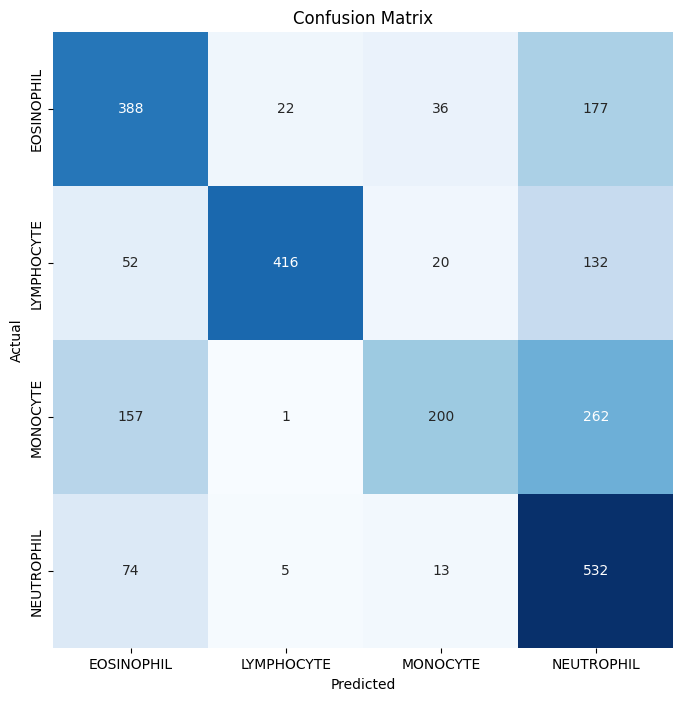

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.58      0.62      0.60       623
  LYMPHOCYTE       0.94      0.67      0.78       620
    MONOCYTE       0.74      0.32      0.45       620
  NEUTROPHIL       0.48      0.85      0.62       624

    accuracy                           0.62      2487
   macro avg       0.69      0.62      0.61      2487
weighted avg       0.68      0.62      0.61      2487



In [ ]:
predictions = np.argmax(model.predict(test_images) , axis=1)

acc = accuracy_score(test_images.labels , predictions)

cm = tf.math.confusion_matrix(test_images.labels , predictions)
clr = classification_report(test_images.labels , predictions , target_names = CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
# Make predictions on the test images
predictions = model.predict(test_images)


78/78 [==============================] - 8s 96ms/step


In [ ]:
# Get the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)


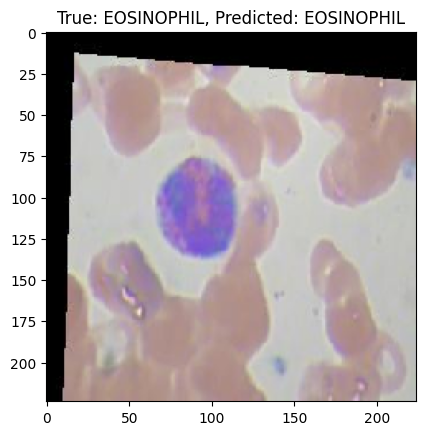

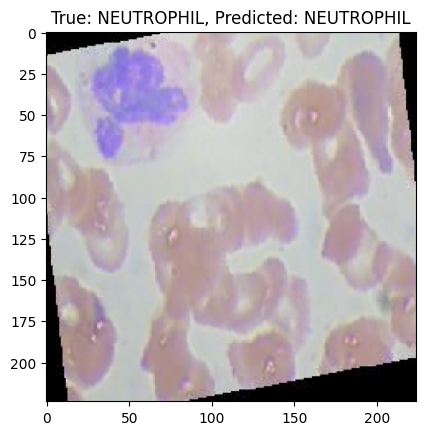

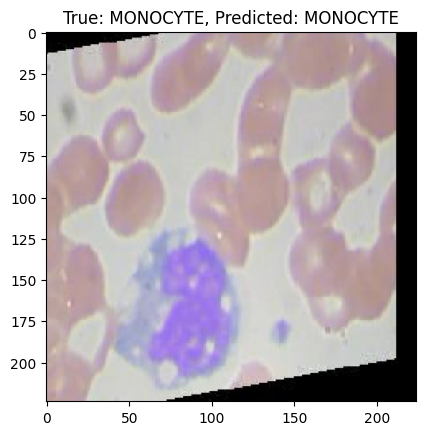

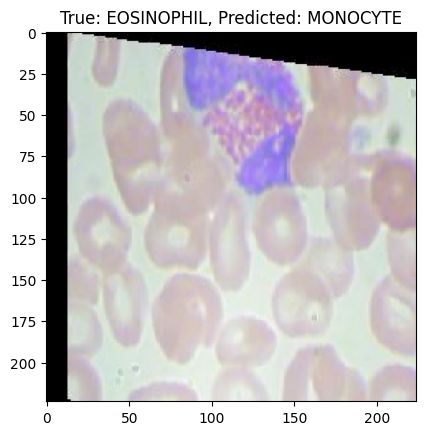

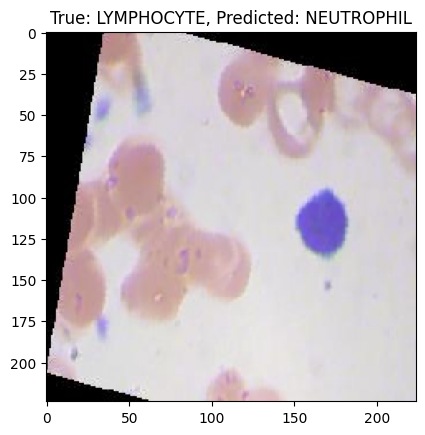

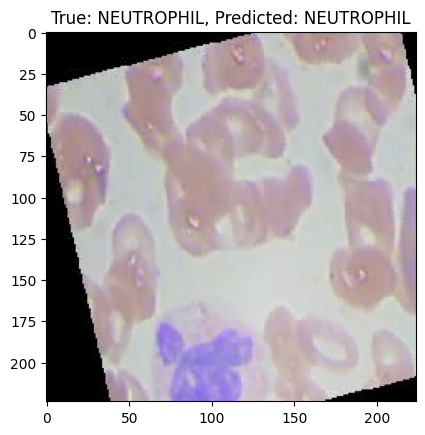

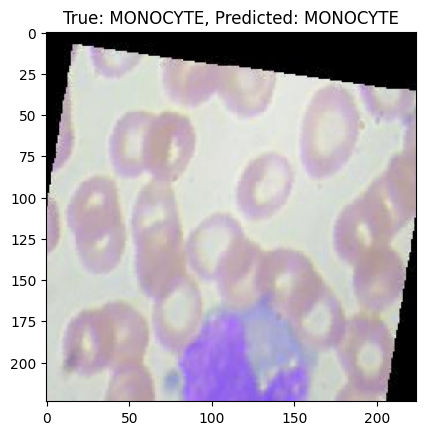

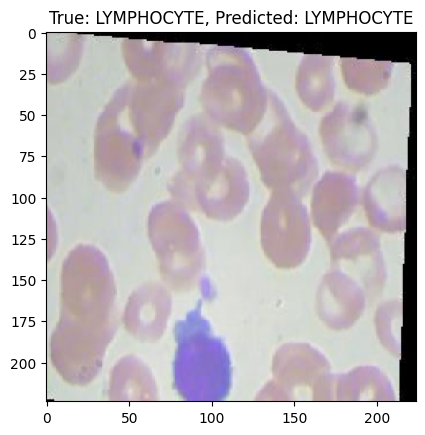

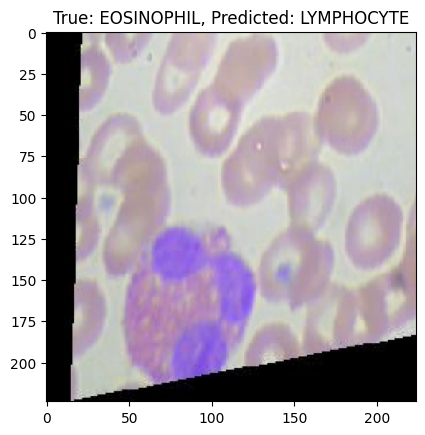

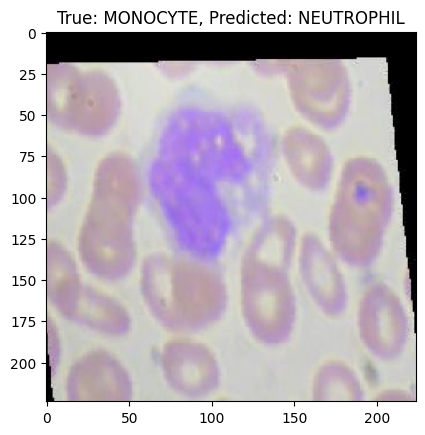

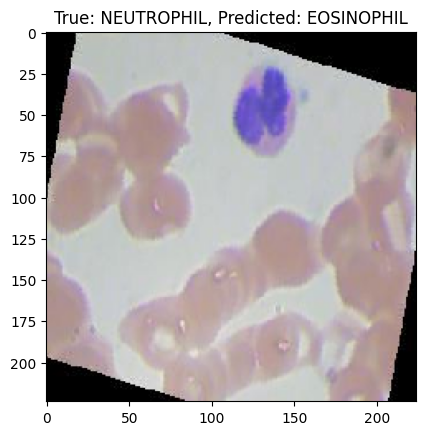

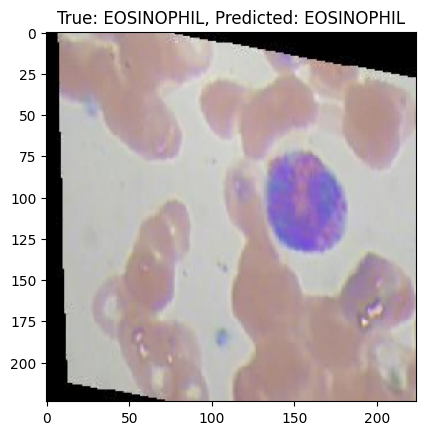

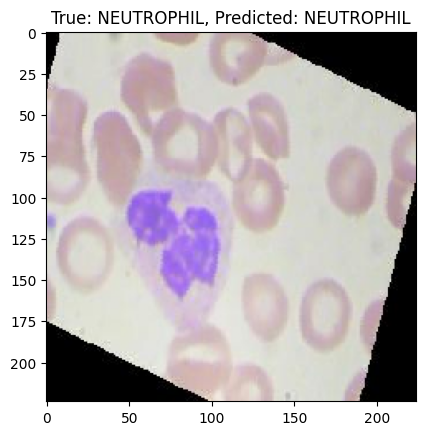

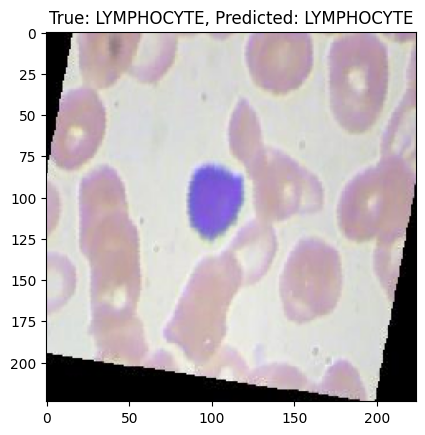

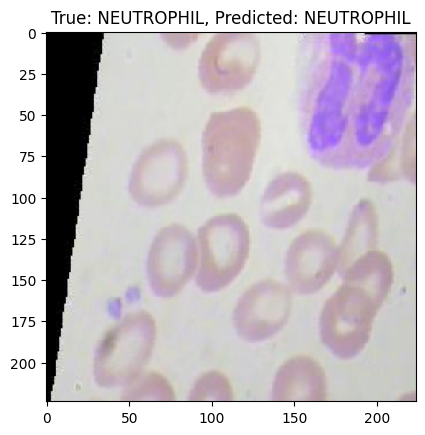

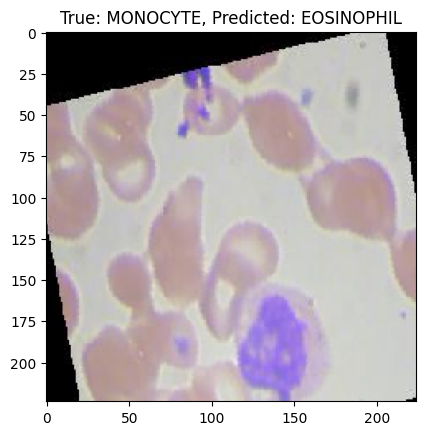

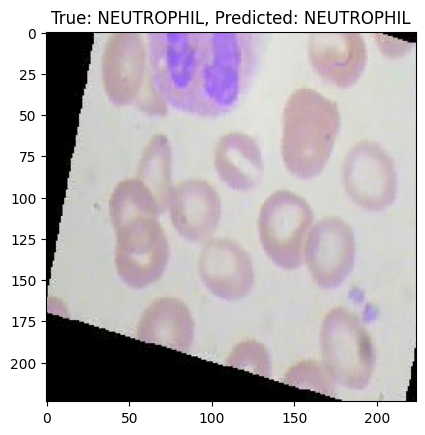

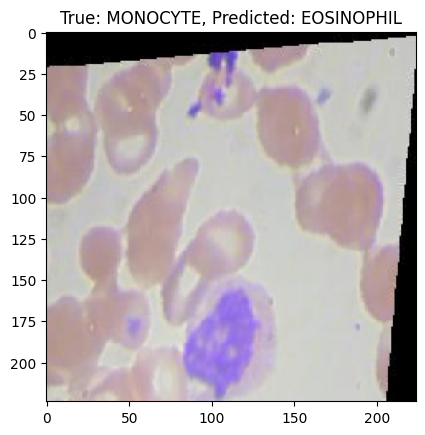

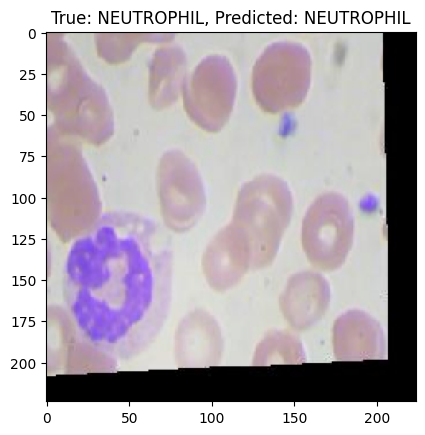

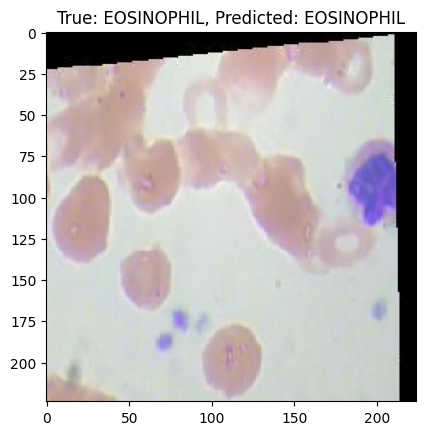

In [ ]:
# Visualize results for a few test images
import random
import os


num_images_to_display = 20

# Get a random order of indices
random_indices = random.sample(range(len(test_images.filenames)), num_images_to_display)

for i in random_indices:
    # Get the image and true label
    img_path = os.path.join(test_dir, test_images.filenames[i])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    true_label = CLASS_NAMES[test_images.labels[i]]

    # Get the predicted label
    predicted_label = CLASS_NAMES[predicted_class_indices[i]]

    # Display the image and labels
    plt.imshow(img_array[0] / 255.0)
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.show()


In [ ]:
# Assuming 'model' is your trained model
model.save('blood_cell_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model('blood_cell_classifier.h5')


In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open('blood_cell_classifier.json', 'w') as json_file:
    json_file.write(model_json)

# Save the learned weights to an HDF5 file
model.save_weights('blood_cell_classifier_weights.h5')


In [ ]:
# Load the model architecture from the JSON file
with open('blood_cell_classifier.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Load the learned weights
loaded_model.load_weights('blood_cell_classifier_weights.h5')


In [ ]:
from flask import Flask, request, jsonify
import tensorflow as tf
import numpy as np
from PIL import Image

app = Flask(__name__)

# Load the trained model
model = tf.keras.models.load_model('blood_cell_classifier.h5')

# Define the class names
CLASS_NAMES = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

def preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

@app.route('/predict', methods=['POST'])
def predict():
    # Get the image file from the request
    file = request.files['image']

    # Save the image temporarily
    temp_image_path = 'temp_image.jpg'
    file.save(temp_image_path)

    # Preprocess the image
    img_array = preprocess_image(temp_image_path)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class = CLASS_NAMES[np.argmax(predictions)]

    # Remove the temporary image file
    os.remove(temp_image_path)

    return jsonify({'prediction': predicted_class})

if __name__ == '__main__':
    app.run(debug=True, port=8080)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
python app.py


In [ ]:
curl -X POST -F "image=@path/to/your/image.jpg" http://127.0.0.1:5000/predict
